# Tesisquare Dataset Analysis

## A data science project by DataITIS

We are a team formed by Grosso Luca, Torterolo Francesco, Risso Beatrice, Vittorio Fino, Viola Peruzzi, Rebecca Simondi e Lorenzo Bruno. 

# Tesisquare Dataset Analysis Project

## Project Structure

1. __Introduction:__ Overview of the project goals and team roles.
2. __Dataset Description:__ Summary of the dataset provided by Tesisquare and its key features.
3. __Exploratory Data Analysis (EDA):__ High-level exploration of trends and patterns.
4. __Conclusions:__ Insights derived from the analysis.

## CSV Structure

- __SERVICETYPE:__  type of service or vehicle used for the delivery
- __VEHICLETYPE:__ type of vehicle
- __DEPARTURE_COUNTRY:__ country of departure
- __DEPARTURE_ZIPCODE:__ zipocde (CAP) of departure
- __ARRIVAL_COUNTRY:__ country of arrival
- __ARRIVAL_ZIPCODE:__ zipcode (CAP) of arrival

## Introduction

In this project, our team analyzed a dataset provided by the company Tesisquare related to logistics to analyze the data and the relationships between the different features of the dataset.

# Dataset Description

The dataset provides logistics data from a company that handles intercontinental shipments, including:

- Logistics details (e.g., mode of transport used, services utilized, shipping day and date). 
- Travel-related information (e.g., departure and arrival countries, departure and arrival zip codes, distance in km).
- Information related to the transported products (e.g., net and gross weight, volume). 

Understanding the data's structure and cleaning it is crucial before diving into the analysis.

# Exploratory Data Analysis (EDA)

## __Goals of the Analysis__

The main objective of this analysis is to understand the relationships between the characteristics of the shipments and the delivery times. Key areas of interest include:

- The difference in vehicles and services.
- The departure and arrival countries
- The shipping date.


### Importation of libraries and upload of the dataset

In this cell we are importing all the libraries that will be necessary for all the different snippets,
and than upload the dataset via an xls file that we gained before using the API on the original dataset

In [134]:
#We include all the libraries for the code
import pandas as pd  #2.2.3 Version
import numpy as np  #2.2.1 Version
import matplotlib.pyplot as plt  #3.10.0 Version
import seaborn as sns  #0.13.2 Version
import warnings  
from sklearn.impute import SimpleImputer  #1.6.1 Version
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from datetime import datetime
import time
import requests
from math import radians, sin, cos, sqrt, atan2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [135]:
# Loading the dataset from a CSV file
data = pd.read_csv("./cleaned_dataset.csv")

# Displaying dataset information (column types, non-null values, etc.)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14307 entries, 0 to 14306
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            14307 non-null  int64  
 1   SERVICETYPE           14307 non-null  int64  
 2   VEHICLETYPE           14307 non-null  int64  
 3   DEPARTURE_COUNTRY     14307 non-null  object 
 4   DEPARTURE_ZIPCODE     14307 non-null  int64  
 5   ARRIVAL_COUNTRY       14307 non-null  object 
 6   ARRIVAL_ZIPCODE       14307 non-null  int64  
 7   SHIPPING_DATE         14307 non-null  object 
 8   GROSS_WEIGHT_KG       14307 non-null  float64
 9   NET_WEIGHT_KG         14307 non-null  float64
 10  VOLUME_M3             14307 non-null  float64
 11  DECLARED_DISTANCE_KM  14307 non-null  float64
 12  ACTUAL_DELIVERY_DATE  14307 non-null  object 
 13  DELIVERY_TIME_HH      14307 non-null  int64  
 14  WDAY                  14307 non-null  int64  
dtypes: float64(4), int6

### Basic analysis of the features and values of the dataset

In the next three cells we analyzed the dataset to understand how to work on it, specially trying to understand
how many NULL data for each feature we had

In [136]:
# Shows the first rows of the dataset
print("First rows of the dataset:")
print(data.head())

First rows of the dataset:
   Unnamed: 0  SERVICETYPE  VEHICLETYPE DEPARTURE_COUNTRY  DEPARTURE_ZIPCODE  \
0          25            1            1                IT              63811   
1          28            2            0                IT              63076   
2          29            2            0                IT              63076   
3          30            2            0                IT              63076   
4          31            2            0                IT              63076   

  ARRIVAL_COUNTRY  ARRIVAL_ZIPCODE            SHIPPING_DATE  GROSS_WEIGHT_KG  \
0              IT            26100  2023-01-03 11:31:25.577             3.20   
1              IT            25020      2023-01-03 00:00:14            12.34   
2              IT            25020      2023-01-03 00:00:14            59.42   
3              IT            25020      2023-01-03 00:00:14           127.00   
4              IT            25020      2023-01-03 00:00:14            17.22   

   NET_WEIG

In [137]:
# Descriptive statistics
print("\nDescriptive statistics:")
data.describe()


Descriptive statistics:


,Unnamed: 0,SERVICETYPE,VEHICLETYPE,DEPARTURE_ZIPCODE,ARRIVAL_ZIPCODE,GROSS_WEIGHT_KG,NET_WEIGHT_KG,VOLUME_M3,DECLARED_DISTANCE_KM,DELIVERY_TIME_HH,WDAY
count,14307.000000,14307.000000,14307.000000,14307.000000,14307.000000,14307.000000,14307.000000,14307.000000,14307.000000,14307.000000,14307.000000
mean,7325.712239,0.782065,0.624519,52814.897113,41802.740477,9.883303,8.129035,0.191306,872.944190,79.917313,1.719648
std,4162.739249,1.033430,0.870510,22684.124813,30214.867383,35.229170,31.974912,0.991557,1695.078219,61.567252,1.511975
min,25.000000,0.000000,0.000000,0.000000,10.000000,0.020000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,3740.500000,0.000000,0.000000,50123.000000,17056.000000,1.000000,0.000000,0.010000,234.530000,38.000000,0.000000
50%,7318.000000,0.000000,0.000000,63076.000000,35122.000000,1.380000,0.000000,0.010000,426.200000,72.000000,1.000000
75%,10895.500000,1.000000,1.000000,63076.000000,66020.000000,3.265000,2.420000,0.110000,549.770000,108.000000,3.000000
max,14554.000000,4.000000,5.000000,99208.000000,99518.000000,1039.820000,948.840000,105.000000,12960.550000,1920.000000,6.000000


In [138]:
data = data.drop(columns=['Unnamed: 0'])

In [139]:
print("Dataset size:", data.shape)  # Dataset's dimension
data.info()  # General information about data types and counting NON-null values

# We calculate the number of missing values for each column
missing_values = data.isnull().sum()

# Printing of missing data in different columns 
print("Columns with missing data")
missing_values[missing_values > 0]  # We only show columns with missing values


# List of specific columns to analyze
colonne_selezionate = [
    'SERVICETYPE',
    'VEHICLETYPE',
    'DEPARTURE_COUNTRY',
    'ARRIVAL_COUNTRY',
    'GROSS_WEIGHT_KG',
    'NET_WEIGHT_KG',
    'VOLUME_M3',
    'DECLARED_DISTANCE_KM',
    'DELIVERY_TIME_HH',
    'WDAY'
]

# Displaying the count for each selected column
for column in colonne_selezionate:
    print(f"\nCount values for the column '{column}':")
    print(data[column].value_counts())
    print("-" * 50)  # Separation line for better readability
    

Dataset size: (14307, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14307 entries, 0 to 14306
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SERVICETYPE           14307 non-null  int64  
 1   VEHICLETYPE           14307 non-null  int64  
 2   DEPARTURE_COUNTRY     14307 non-null  object 
 3   DEPARTURE_ZIPCODE     14307 non-null  int64  
 4   ARRIVAL_COUNTRY       14307 non-null  object 
 5   ARRIVAL_ZIPCODE       14307 non-null  int64  
 6   SHIPPING_DATE         14307 non-null  object 
 7   GROSS_WEIGHT_KG       14307 non-null  float64
 8   NET_WEIGHT_KG         14307 non-null  float64
 9   VOLUME_M3             14307 non-null  float64
 10  DECLARED_DISTANCE_KM  14307 non-null  float64
 11  ACTUAL_DELIVERY_DATE  14307 non-null  object 
 12  DELIVERY_TIME_HH      14307 non-null  int64  
 13  WDAY                  14307 non-null  int64  
dtypes: float64(4), int64(6), object(4)
memory us

## Calculate the distance

This code uses an extern API called Nominatim to calculate the distances between the zip code

In [140]:
def get_coordinates(postal_code, country):
    """
    Ottiene le coordinate geografiche di un codice postale per IT o US
    """
    if country not in ['IT', 'US']:
        raise ValueError(f"Paese non supportato: {country}")
    
    # Costruisce la query appropriata per il paese
    if country == 'IT':
        query = f"{postal_code}, Italy"
    else:
        query = f"{postal_code}, United States"
    
    url = "https://nominatim.openstreetmap.org/search"
    params = {
        "q": query,
        "format": "json",
        "limit": 1,
        "countrycodes": country.lower()
    }
    headers = {
        "User-Agent": "DistanceCalculator/1.0"
    }
    
    try:
        response = requests.get(url, params=params, headers=headers)
        response.raise_for_status()
        data = response.json()
        
        if not data:
            raise ValueError(f"Codice postale non trovato: {postal_code} in {country}")
        
        # Rispetta il rate limiting di Nominatim
        time.sleep(1)
        
        return {
            "lat": float(data[0]["lat"]),
            "lon": float(data[0]["lon"])
        }
    except requests.exceptions.RequestException as e:
        raise Exception(f"Errore nella richiesta API: {str(e)}")

def calculate_distance(coord1, coord2):
    """
    Calcola la distanza in kilometri tra due punti usando la formula di Haversine
    """
    R = 6371  # Raggio della Terra in km
    
    lat1, lon1 = radians(coord1["lat"]), radians(coord1["lon"])
    lat2, lon2 = radians(coord2["lat"]), radians(coord2["lon"])
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c
    
    return distance

def process_csv(file_path):
    """
    Legge il CSV e aggiorna le distanze mancanti nella colonna DECLARED_DISTANCE_KM
    per spedizioni IT-IT, US-US, IT-US e US-IT
    """
    try:
        # Legge il CSV
        df = pd.read_csv(file_path)
        
        # Se non esiste la colonna DECLARED_DISTANCE_KM, la crea
        if 'DECLARED_DISTANCE_KM' not in df.columns:
            df['DECLARED_DISTANCE_KM'] = np.nan
        
        # Filtra le spedizioni IT e US
        mask = (
            ((df['DEPARTURE_COUNTRY'].isin(['IT', 'US'])) & 
             (df['ARRIVAL_COUNTRY'].isin(['IT', 'US'])))
        )
        valid_rows = df[mask].index
        
        if len(valid_rows) == 0:
            raise ValueError("Nessuna spedizione IT/US trovata nel CSV")
        
        # Statistiche iniziali
        stats = {
            'IT-IT': len(df[(df['DEPARTURE_COUNTRY'] == 'IT') & (df['ARRIVAL_COUNTRY'] == 'IT')]),
            'US-US': len(df[(df['DEPARTURE_COUNTRY'] == 'US') & (df['ARRIVAL_COUNTRY'] == 'US')]),
            'IT-US': len(df[(df['DEPARTURE_COUNTRY'] == 'IT') & (df['ARRIVAL_COUNTRY'] == 'US')]),
            'US-IT': len(df[(df['DEPARTURE_COUNTRY'] == 'US') & (df['ARRIVAL_COUNTRY'] == 'IT')])
        }
        
        print("Spedizioni trovate:")
        for route, count in stats.items():
            print(f"{route}: {count}")
        
        # Conta quante distanze devono essere calcolate
        missing_distances = df.loc[valid_rows, 'DECLARED_DISTANCE_KM'].isna().sum()
        print(f"\nDistanze da calcolare: {missing_distances}")
        
        # Elabora le righe con distanza mancante
        rows_processed = 0
        for idx in valid_rows:
            # Salta se la distanza è già presente
            if pd.notna(df.at[idx, 'DECLARED_DISTANCE_KM']):
                continue
                
            try:
                departure_code = str(df.at[idx, 'DEPARTURE_ZIPCODE'])
                arrival_code = str(df.at[idx, 'ARRIVAL_ZIPCODE'])
                departure_country = df.at[idx, 'DEPARTURE_COUNTRY']
                arrival_country = df.at[idx, 'ARRIVAL_COUNTRY']
                
                # Ottiene le coordinate
                coord1 = get_coordinates(departure_code, departure_country)
                coord2 = get_coordinates(arrival_code, arrival_country)
                
                # Calcola la distanza
                distance = calculate_distance(coord1, coord2)
                df.at[idx, 'DECLARED_DISTANCE_KM'] = round(distance, 2)
                
                rows_processed += 1
                print(f"Elaborata riga {idx + 1}: {departure_code}({departure_country}) -> "
                      f"{arrival_code}({arrival_country}) = {distance:.2f} km ({rows_processed}/{missing_distances})")
                
                # Salva periodicamente ogni 10 righe elaborate
                if rows_processed % 10 == 0:
                    df.to_csv(file_path, index=False)
                    print(f"Salvaggio intermedio effettuato dopo {rows_processed} righe")
                
            except Exception as e:
                print(f"Errore nella riga {idx + 1}: {str(e)}")
                continue
        
        # Salvataggio finale
        df.to_csv(file_path, index=False)
        print(f"\nFile aggiornato salvato in: {file_path}")
        
        # Mostra statistiche finali per ogni tipo di percorso
        print("\nStatistiche delle distanze per tipo di percorso:")
        for dep_country in ['IT', 'US']:
            for arr_country in ['IT', 'US']:
                route_mask = (df['DEPARTURE_COUNTRY'] == dep_country) & (df['ARRIVAL_COUNTRY'] == arr_country)
                route_distances = df[route_mask]['DECLARED_DISTANCE_KM'].dropna()
                
                if not route_distances.empty:
                    print(f"\n{dep_country}-{arr_country}:")
                    print(f"Numero spedizioni: {len(route_distances)}")
                    print(f"Distanza media: {route_distances.mean():.2f} km")
                    print(f"Distanza massima: {route_distances.max():.2f} km")
                    print(f"Distanza minima: {route_distances.min():.2f} km")
        
        return df
        
    except Exception as e:
        raise Exception(f"Errore nell'elaborazione del CSV: {str(e)}")

# Esempio di utilizzo
if __name__ == "__main__":
    try:
        input_file = input("Inserisci il percorso del file CSV da elaborare: ")
        results = process_csv(input_file)
        
    except Exception as e:
        print(f"Errore: {str(e)}")

Inserisci il percorso del file CSV da elaborare:  cleaned_dataset.csv


Spedizioni trovate:
IT-IT: 11515
US-US: 2223
IT-US: 569
US-IT: 0

Distanze da calcolare: 0

File aggiornato salvato in: cleaned_dataset.csv

Statistiche delle distanze per tipo di percorso:

IT-IT:
Numero spedizioni: 11515
Distanza media: 352.71 km
Distanza massima: 1090.61 km
Distanza minima: 0.64 km

IT-US:
Numero spedizioni: 569
Distanza media: 8496.95 km
Distanza massima: 12960.55 km
Distanza minima: 6457.40 km

US-US:
Numero spedizioni: 2223
Distanza media: 1616.26 km
Distanza massima: 7818.48 km
Distanza minima: 0.00 km


### Count of shippings arrival and departure

Than we tried to find out how many deliveries we had from various combination of start point and arrival point:

- from US to Everywhere
- from US to Everywhere (listed based on the country of arrival)
- from US to US
- from US to IT
- from IT to Everywhere
- from IT to Everywhere (listed based on the country of arrival)
- from IT to US
- from IT to IT

In [141]:
# Count shipments from the United States (US)
us_shipments_count = data[data['DEPARTURE_COUNTRY'] == 'US'].shape[0]
print(f"\nNumber of shipments from US: {us_shipments_count}")


# Shipment count by country of arrival, only for those departing from the US
arrival_counts_us = data[data['DEPARTURE_COUNTRY'] == 'US']['ARRIVAL_COUNTRY'].value_counts()
print("\nShipment count by country of arrival (shipments from US only):")
print(arrival_counts_us)


# Total shipments from US to IT
us_to_it_count = data[(data['DEPARTURE_COUNTRY'] == 'US') & (data['ARRIVAL_COUNTRY'] == 'IT')].shape[0]
print(f"Number of shipments from US to IT: {us_to_it_count}")


# Total shipments from US to US
us_to_us_count = data[(data['DEPARTURE_COUNTRY'] == 'US') & (data['ARRIVAL_COUNTRY'] == 'US')].shape[0]
print(f"Number of shipments from US to US: {us_to_us_count}")


# Count shipments from Italy (IT)
it_shipments_count = data[data['DEPARTURE_COUNTRY'] == 'IT'].shape[0]
print(f"\nNumber of shipments from IT: {it_shipments_count}")


# Shipment count by country of arrival, only for those departing from IT
arrival_counts_it = data[data['DEPARTURE_COUNTRY'] == 'IT']['ARRIVAL_COUNTRY'].value_counts()
print("\nShipment count by country of arrival (departments from IT only):")
print(arrival_counts_it)


# Total shipments from IT to US
it_to_us_count = data[(data['DEPARTURE_COUNTRY'] == 'IT') & (data['ARRIVAL_COUNTRY'] == 'US')].shape[0]
print(f"Number of shipments from IT to US: {it_to_us_count}")


# Total shipments from IT to IT
it_to_it_count = data[(data['DEPARTURE_COUNTRY'] == 'IT') & (data['ARRIVAL_COUNTRY'] == 'IT')].shape[0]
print(f"Number of shipments from IT to IT: {it_to_it_count}")


Number of shipments from US: 2223

Shipment count by country of arrival (shipments from US only):
ARRIVAL_COUNTRY
US    2223
Name: count, dtype: int64
Number of shipments from US to IT: 0
Number of shipments from US to US: 2223

Number of shipments from IT: 12084

Shipment count by country of arrival (departments from IT only):
ARRIVAL_COUNTRY
IT    11515
US      569
Name: count, dtype: int64
Number of shipments from IT to US: 569
Number of shipments from IT to IT: 11515


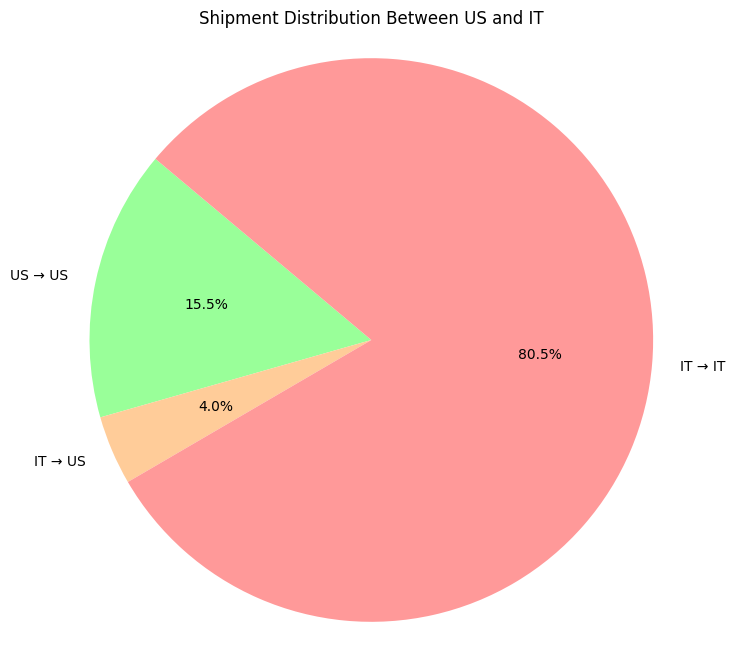

In [142]:
all_labels = ['US → IT', 'US → US', 'IT → US', 'IT → IT']
all_counts = [us_to_it_count, us_to_us_count, it_to_us_count, it_to_it_count]
all_colors = ['#66b3ff', '#99ff99', '#ffcc99', '#ff9999']

# Filter out routes with 0 shipments
labels = []
counts = []
colors = []

for label, count, color in zip(all_labels, all_counts, all_colors):
    if count > 0:
        labels.append(label)
        counts.append(count)
        colors.append(color)

# Create the pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)  # Plot pie chart
plt.title('Shipment Distribution Between US and IT')  # Set title
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle

plt.show()  # Display the chart

In [143]:
# Filter rows without null values
data = data.dropna()

# Save the new DataFrame to a CSV file
output_file_path = './clean.csv'
data.to_csv(output_file_path, index=False)

print(f"New CSV created with rows without null values: {output_file_path}")

New CSV created with rows without null values: ./clean.csv


In [144]:
# Step 2: Fill missing values in categorical columns before mapping
categorical_cols = ['SERVICETYPE', 'VEHICLETYPE']
categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = categorical_imputer.fit_transform(data[categorical_cols])

# Step 5: Handle missing values in 'DEPARTURE_ZIPCODE' and convert to integer
data['DEPARTURE_ZIPCODE'] = data['DEPARTURE_ZIPCODE'].fillna(0).astype(int)

# Step 6: Ensure 'SERVICETYPE' and 'VEHICLETYPE' are integers (safe after mapping)
data['SERVICETYPE'] = data['SERVICETYPE'].astype(int)
data['VEHICLETYPE'] = data['VEHICLETYPE'].astype(int)

# Step 7: Remove records where DELIVERY_TIME_HH is zero or negative
data = data[data['DELIVERY_TIME_HH'] > 0]

# Step 8: Display the cleaned data (optional)
print(data.head())


   SERVICETYPE  VEHICLETYPE DEPARTURE_COUNTRY  DEPARTURE_ZIPCODE  \
0            1            1                IT              63811   
1            2            0                IT              63076   
2            2            0                IT              63076   
3            2            0                IT              63076   
4            2            0                IT              63076   

  ARRIVAL_COUNTRY  ARRIVAL_ZIPCODE            SHIPPING_DATE  GROSS_WEIGHT_KG  \
0              IT            26100  2023-01-03 11:31:25.577             3.20   
1              IT            25020      2023-01-03 00:00:14            12.34   
2              IT            25020      2023-01-03 00:00:14            59.42   
3              IT            25020      2023-01-03 00:00:14           127.00   
4              IT            25020      2023-01-03 00:00:14            17.22   

   NET_WEIGHT_KG  VOLUME_M3  DECLARED_DISTANCE_KM ACTUAL_DELIVERY_DATE  \
0           2.70       0.07         

In [145]:
def correlation_matrix_from_csv(input_file):
    '''
    Create correlation matrix

    Args:
    input_file (str): path to input CSV file
    '''
    
    # Read the dataset
    df = pd.read_csv(input_file)

    # Select only the numeric columns of interest
    columns_of_interest = [
        'GROSS_WEIGHT_KG',
        'NET_WEIGHT_KG',
        'VOLUME_M3',
        'DECLARED_DISTANCE_KM',
        'DELIVERY_TIME_HH',
        'WDAY'
    ]

    # Calculate the correlation matrix
    correlation_matrix = df[columns_of_interest].corr()

    # Create a larger figure for better readability
    plt.figure(figsize=(12, 10))

    # Create the correlogram using seaborn
    sns.heatmap(correlation_matrix, 
                annot=True,  # Show numeric values
                cmap='RdBu',  # Use a blue-red colormap
                vmin=-1, vmax=1,  # Set scale limits
                center=0,  # Center the colormap on zero
                fmt='.2f')  # Show two decimals

    # Rotate labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)

    # Add a title
    plt.title('Correlation matrix of Transport Variables', pad=20)

    # Adjust the layout
    plt.tight_layout()
    plt.show()

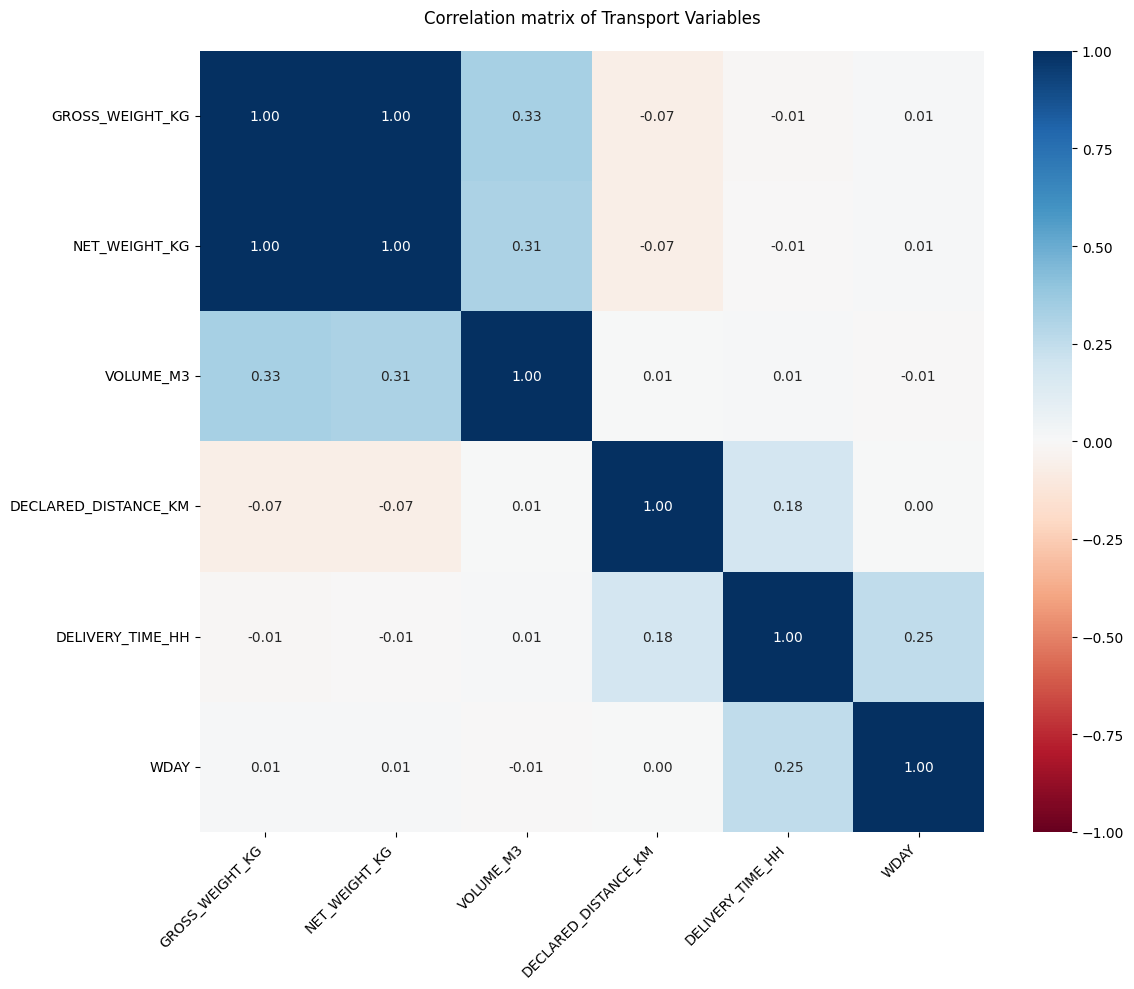

In [146]:
correlation_matrix_from_csv('delivery_clean.csv')

In [147]:
def histogram_average_time_x_day_from_csv(input_file, graph_color):
    '''
    Create Histogram average time by day of the week

    Args:
    input_file (str): path to input CSV file
    graph_color (str): color for the graph
    '''
    # Load the dataset
    df_gomma = pd.read_csv(input_file)

    # Calculate the average delivery time for each day of the week
    mean_delivery_time_gomma = df_gomma.groupby('WDAY')['DELIVERY_TIME_HH'].mean()

    # Create a DataFrame with all days of the week
    days_of_week = pd.DataFrame({'WDAY': range(7)})
    mean_delivery_time_gomma = mean_delivery_time_gomma.reset_index()
    mean_delivery_time_gomma = days_of_week.merge(mean_delivery_time_gomma, on='WDAY', how='left').fillna(0)

    # Create the histogram
    plt.figure(figsize=(10, 6))
    bars = plt.bar(mean_delivery_time_gomma['WDAY'], mean_delivery_time_gomma['DELIVERY_TIME_HH'], color=graph_color, edgecolor='black')
    plt.xlabel('Day of the Week', fontsize=14)
    plt.ylabel('Average Travel Time (Hours)', fontsize=14)
    plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add value labels above each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=12)

    plt.tight_layout()
    plt.show()

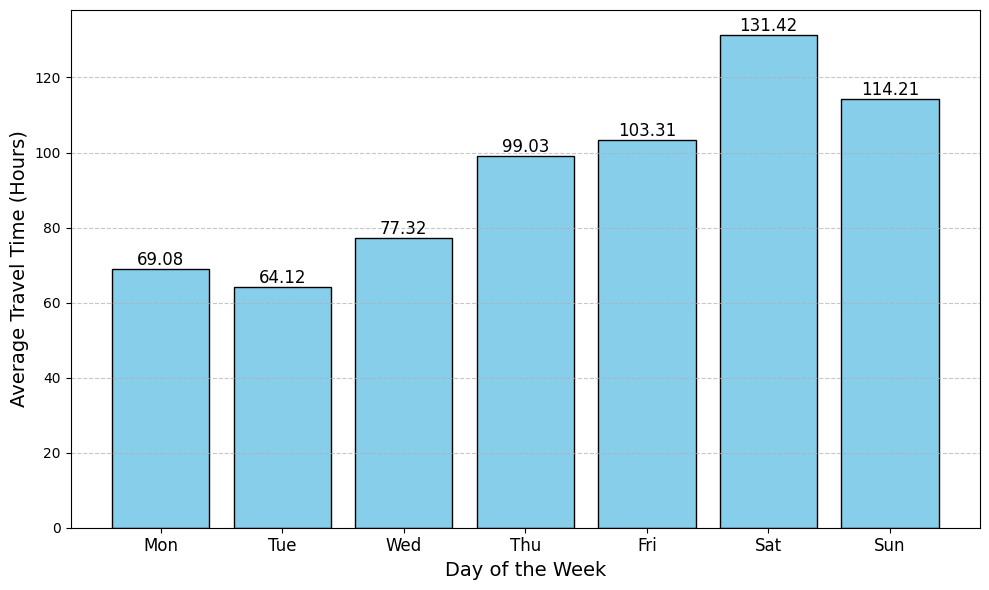

In [148]:
histogram_average_time_x_day_from_csv('cleaned_dataset.csv', 'skyblue')

# Regression graphs

In [149]:
data = data.dropna()

# Map arrival country codes to numeric values: IT -> 0, US -> 1
data['ARRIVAL_COUNTRY'] = data['ARRIVAL_COUNTRY'].map({
    'IT': 0,
    'US': 1   
})

# Map departure country codes to numeric values: IT -> 0, US -> 1
data['DEPARTURE_COUNTRY'] = data['DEPARTURE_COUNTRY'].map({
    'IT': 0,
    'US': 1   
})

### Regression of delivery data from Italy to Italy

In [150]:
dataItIt = data[(data['DEPARTURE_COUNTRY'] == 0) & (data['ARRIVAL_COUNTRY'] == 0)]
dataItIt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11515 entries, 0 to 14304
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SERVICETYPE           11515 non-null  int64  
 1   VEHICLETYPE           11515 non-null  int64  
 2   DEPARTURE_COUNTRY     11515 non-null  int64  
 3   DEPARTURE_ZIPCODE     11515 non-null  int64  
 4   ARRIVAL_COUNTRY       11515 non-null  int64  
 5   ARRIVAL_ZIPCODE       11515 non-null  int64  
 6   SHIPPING_DATE         11515 non-null  object 
 7   GROSS_WEIGHT_KG       11515 non-null  float64
 8   NET_WEIGHT_KG         11515 non-null  float64
 9   VOLUME_M3             11515 non-null  float64
 10  DECLARED_DISTANCE_KM  11515 non-null  float64
 11  ACTUAL_DELIVERY_DATE  11515 non-null  object 
 12  DELIVERY_TIME_HH      11515 non-null  int64  
 13  WDAY                  11515 non-null  int64  
dtypes: float64(4), int64(8), object(2)
memory usage: 1.3+ MB


R^2 Score: 0.20308557821189932


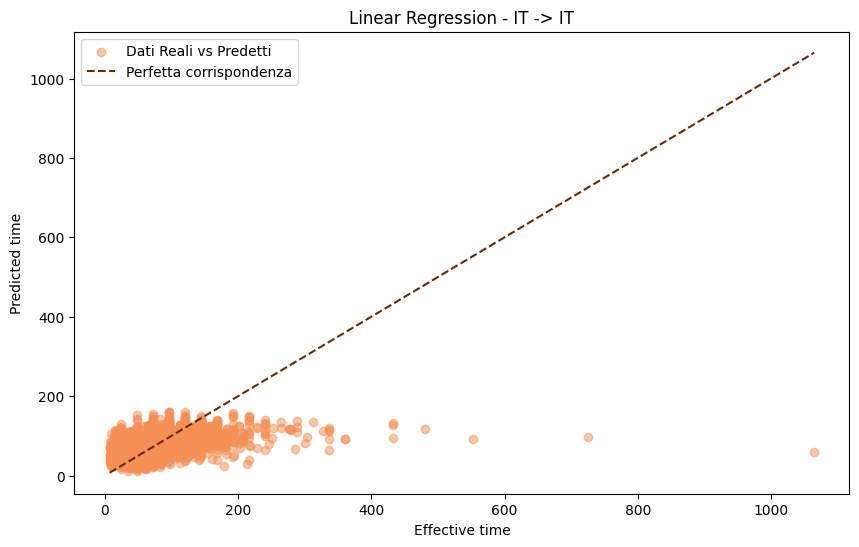

In [151]:
# Selezionare le feature e la variabile target
X = dataItIt[['VEHICLETYPE', 'NET_WEIGHT_KG', 'DECLARED_DISTANCE_KM', 'SERVICETYPE', 'WDAY']]
y = dataItIt['DELIVERY_TIME_HH']  # La variabile target è l'altezza del figlio

# Dividere il dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creare il modello di regressione lineare
model = LinearRegression()
model.fit(X_train, y_train)

# Fare predizioni sul test set
y_pred = model.predict(X_test)

print("R^2 Score:", r2_score(y_test, y_pred))

# Visualizzare i risultati (grafico)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='#f49055', alpha=0.5, label="Dati Reali vs Predetti")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#692900', linestyle='--', label="Perfetta corrispondenza")
plt.xlabel("Effective time")
plt.ylabel("Predicted time")
plt.title("Linear Regression - IT -> IT")
plt.legend()
plt.savefig('itit.png', dpi = 180, bbox_inches = 'tight')
plt.show()

### Regression of delivery data from Italy to Italy

In [152]:
dataItUs = data[(data['DEPARTURE_COUNTRY'] == 0) & (data['ARRIVAL_COUNTRY'] == 1)]
dataItUs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 234 to 14039
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SERVICETYPE           569 non-null    int64  
 1   VEHICLETYPE           569 non-null    int64  
 2   DEPARTURE_COUNTRY     569 non-null    int64  
 3   DEPARTURE_ZIPCODE     569 non-null    int64  
 4   ARRIVAL_COUNTRY       569 non-null    int64  
 5   ARRIVAL_ZIPCODE       569 non-null    int64  
 6   SHIPPING_DATE         569 non-null    object 
 7   GROSS_WEIGHT_KG       569 non-null    float64
 8   NET_WEIGHT_KG         569 non-null    float64
 9   VOLUME_M3             569 non-null    float64
 10  DECLARED_DISTANCE_KM  569 non-null    float64
 11  ACTUAL_DELIVERY_DATE  569 non-null    object 
 12  DELIVERY_TIME_HH      569 non-null    int64  
 13  WDAY                  569 non-null    int64  
dtypes: float64(4), int64(8), object(2)
memory usage: 66.7+ KB


R^2 Score: 0.7051169506197388


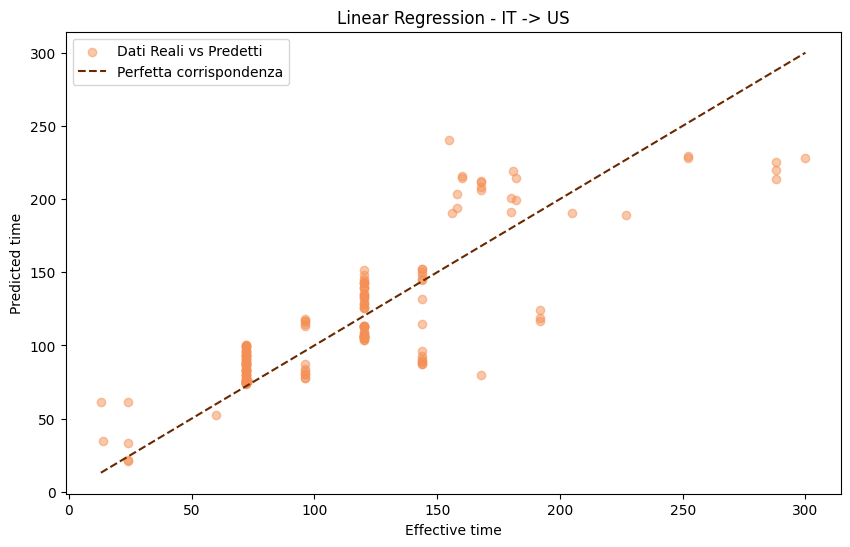

In [153]:
# Selezionare le feature e la variabile target
X = dataItUs[['VEHICLETYPE', 'NET_WEIGHT_KG', 'DECLARED_DISTANCE_KM', 'SERVICETYPE', 'WDAY']]
y = dataItUs['DELIVERY_TIME_HH']

# Dividere il dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creare il modello di regressione lineare
model = LinearRegression()
model.fit(X_train, y_train)

# Fare predizioni sul test set
y_pred = model.predict(X_test)

print("R^2 Score:", r2_score(y_test, y_pred))

# Visualizzare i risultati (grafico)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='#f49055', alpha=0.5, label="Dati Reali vs Predetti")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#692900', linestyle='--', label="Perfetta corrispondenza")
plt.xlabel("Effective time")
plt.ylabel("Predicted time")
plt.title("Linear Regression - IT -> US")
plt.legend()
plt.savefig('itus.png', dpi = 180, bbox_inches = 'tight')
plt.show()

### Regression of delivery data from Italy to Italy

In [158]:
dataUsUs = data[(data['DEPARTURE_COUNTRY'] == 1) & (data['ARRIVAL_COUNTRY'] == 1)]
dataUsUs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2223 entries, 27 to 14306
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SERVICETYPE           2223 non-null   int64  
 1   VEHICLETYPE           2223 non-null   int64  
 2   DEPARTURE_COUNTRY     2223 non-null   int64  
 3   DEPARTURE_ZIPCODE     2223 non-null   int64  
 4   ARRIVAL_COUNTRY       2223 non-null   int64  
 5   ARRIVAL_ZIPCODE       2223 non-null   int64  
 6   SHIPPING_DATE         2223 non-null   object 
 7   GROSS_WEIGHT_KG       2223 non-null   float64
 8   NET_WEIGHT_KG         2223 non-null   float64
 9   VOLUME_M3             2223 non-null   float64
 10  DECLARED_DISTANCE_KM  2223 non-null   float64
 11  ACTUAL_DELIVERY_DATE  2223 non-null   object 
 12  DELIVERY_TIME_HH      2223 non-null   int64  
 13  WDAY                  2223 non-null   int64  
dtypes: float64(4), int64(8), object(2)
memory usage: 260.5+ KB


R^2 Score: 0.33307517405939946


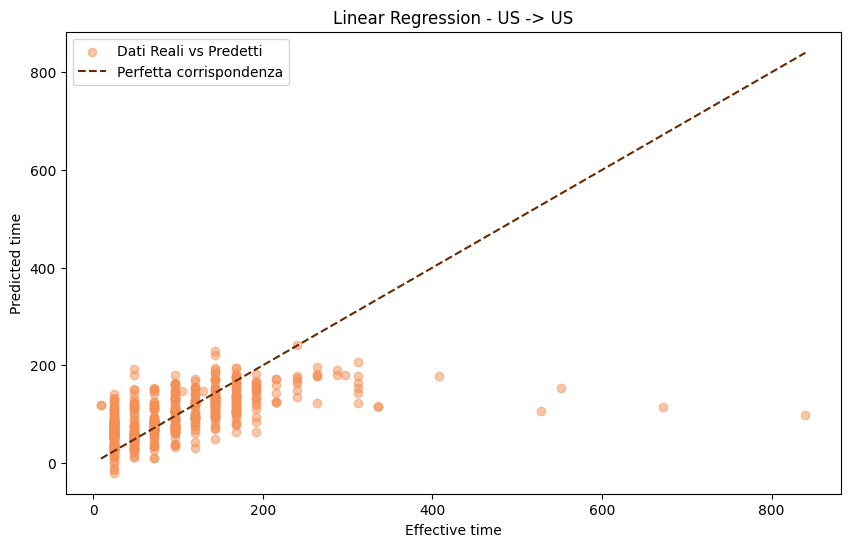

In [159]:
# Selezionare le feature e la variabile target
X = dataUsUs[['VEHICLETYPE', 'NET_WEIGHT_KG', 'DECLARED_DISTANCE_KM', 'SERVICETYPE', 'WDAY']]
y = dataUsUs['DELIVERY_TIME_HH']
# Dividere il dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creare il modello di regressione lineare
model = LinearRegression()
model.fit(X_train, y_train)

# Fare predizioni sul test set
y_pred = model.predict(X_test)


print("R^2 Score:", r2_score(y_test, y_pred))

# Visualizzare i risultati (grafico)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='#f49055', alpha=0.5, label="Dati Reali vs Predetti")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#692900', linestyle='--', label="Perfetta corrispondenza")
plt.xlabel("Effective time")
plt.ylabel("Predicted time")
plt.title("Linear Regression - US -> US")
plt.legend()

plt.savefig('usus.png', dpi = 180, bbox_inches = 'tight')

plt.show()

## Conclusions

We found out that there is a huge amount of deliveries that comes and goes from Italy compared to the amount from the US and there are none from Italy to the US.
We also noticed that more deliveries starts from the first days of the week, we recommend to try to analyze this phenomenom in order to understand and project a optimized way to spread those deliveries in the rest of the week.
Another thing we saw it's that most of the deliveries comes from a specific zipcode.